In [51]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [52]:
image = cv2.imread('sar_2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

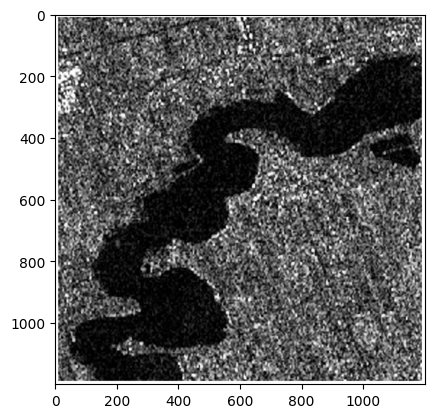

In [53]:
plt.imshow(image_gray, cmap="gray")

# Точечная бинаризация

In [54]:
import copy

bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

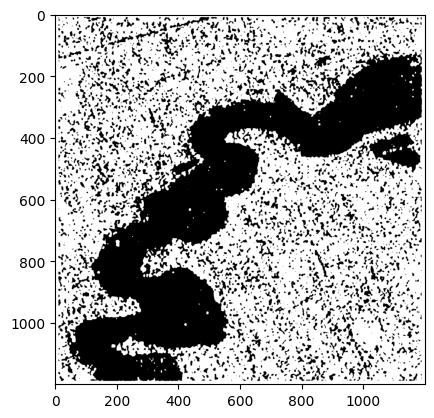

In [55]:
plt.imshow(bin_img, cmap="gray")

# Бинаризация Отсу

In [56]:
# otsu binarization
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

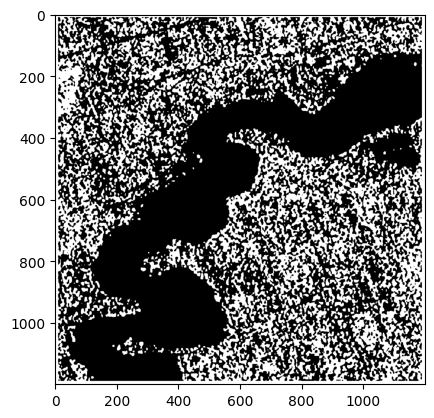

In [57]:
plt.imshow(th2, cmap="gray")

# Адаптивная бинаризация

In [58]:
#
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)


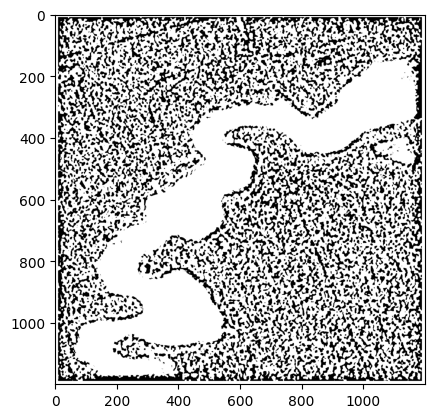

In [59]:
plt.imshow(th3, cmap="gray")

# Оператор Собеля

In [60]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

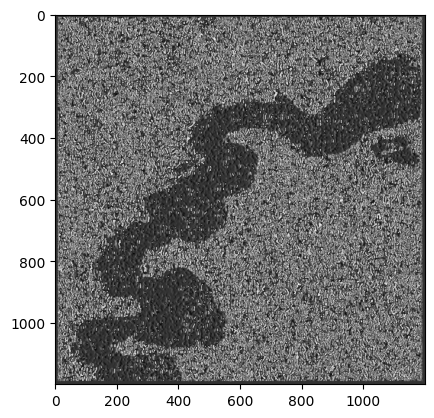

In [61]:
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

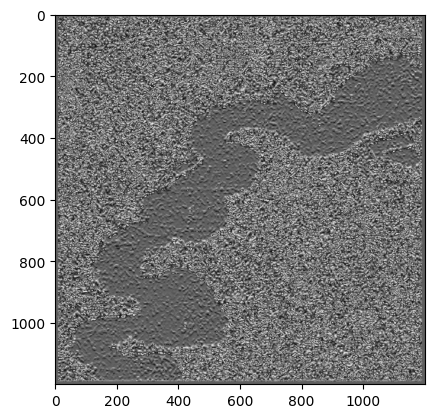

In [62]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

In [63]:
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0) # mean value between

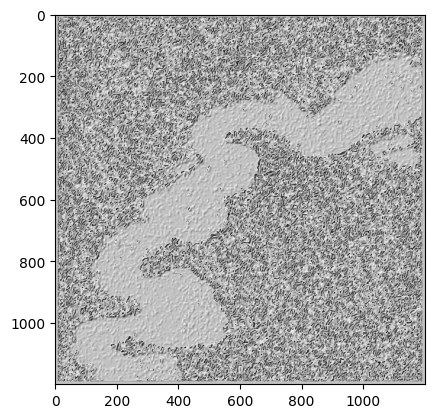

In [64]:
plt.imshow((grad - grad.min())*255, cmap="gray")

# Canny

In [65]:
edges = cv2.Canny(image_gray,100,200)

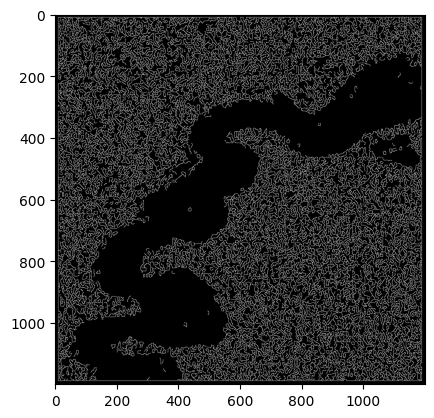

In [66]:
plt.imshow(edges, cmap="gray")

# Преобразование Хафа

In [67]:
image = cv2.imread('img_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

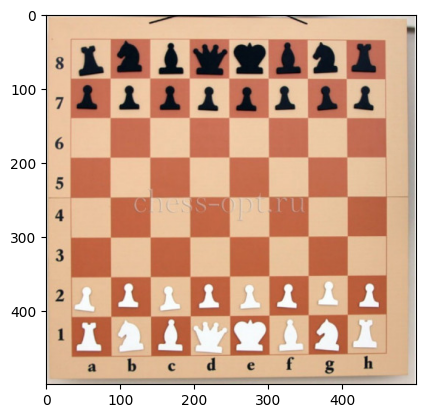

In [68]:
plt.imshow(image)

In [69]:
canny = cv2.Canny(image_gray,50,150,apertureSize = 3)

In [70]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 190)

In [71]:
import math

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

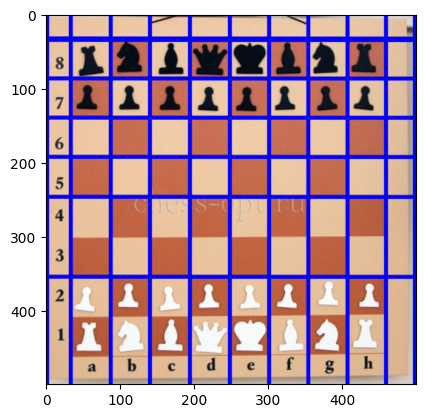

In [72]:
plt.imshow(image)

In [73]:
#ДЗ
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

# Задание 1

In [74]:
image = cv2.imread('sar_3.jpg')
image_copy = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [75]:
canny = cv2.Canny(image_gray,50,150,apertureSize = 3)

In [76]:
# Вариант 1: Стандартное преобразование Хафа
lines = cv2.HoughLines(canny, 1, np.pi / 180, 110)

if lines is not None:
    max_length = 0
    longest = None

    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

        cv2.line(image, pt1, pt2, (0,255,0), 1, cv2.LINE_AA)

        # Calc line length (vector length formula)
        length = math.sqrt((pt2[0] - pt1[0])**2 + (pt2[1] - pt1[1])**2)

        if length > max_length:
            max_length = length
            longest = (pt1, pt2)

    if longest:
        cv2.line(image, longest[0], longest[1], (0, 0, 255), 3, cv2.LINE_AA)

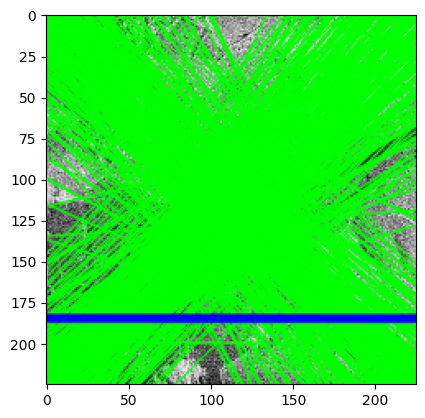

In [77]:
plt.imshow(image)


In [78]:
# Вариант 2: Вероятностное преобразование Хафа
lines = cv2.HoughLinesP(canny, 1, np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)

if lines is not None:
    longest = max(lines, key=lambda line: np.linalg.norm(line[0][:2] - line[0][2:]))
    x1, y1, x2, y2 = longest[0]
    cv2.line(image_copy, (x1, y1), (x2, y2), (0, 0, 255), 3, cv2.LINE_AA)

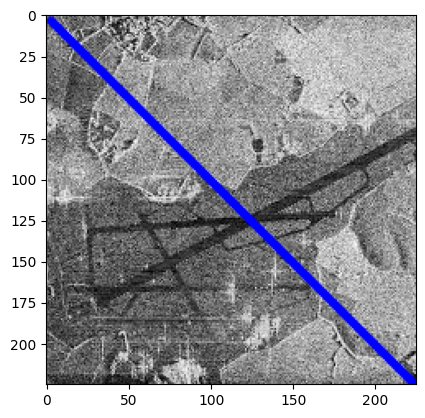

In [79]:
plt.imshow(image_copy)

# Задание 2

In [80]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [81]:
T = 100
_, th4 = cv2.threshold(image_gray, T, 255, cv2.THRESH_BINARY)

In [82]:
_, th5 = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [83]:
th6 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,1001,51)

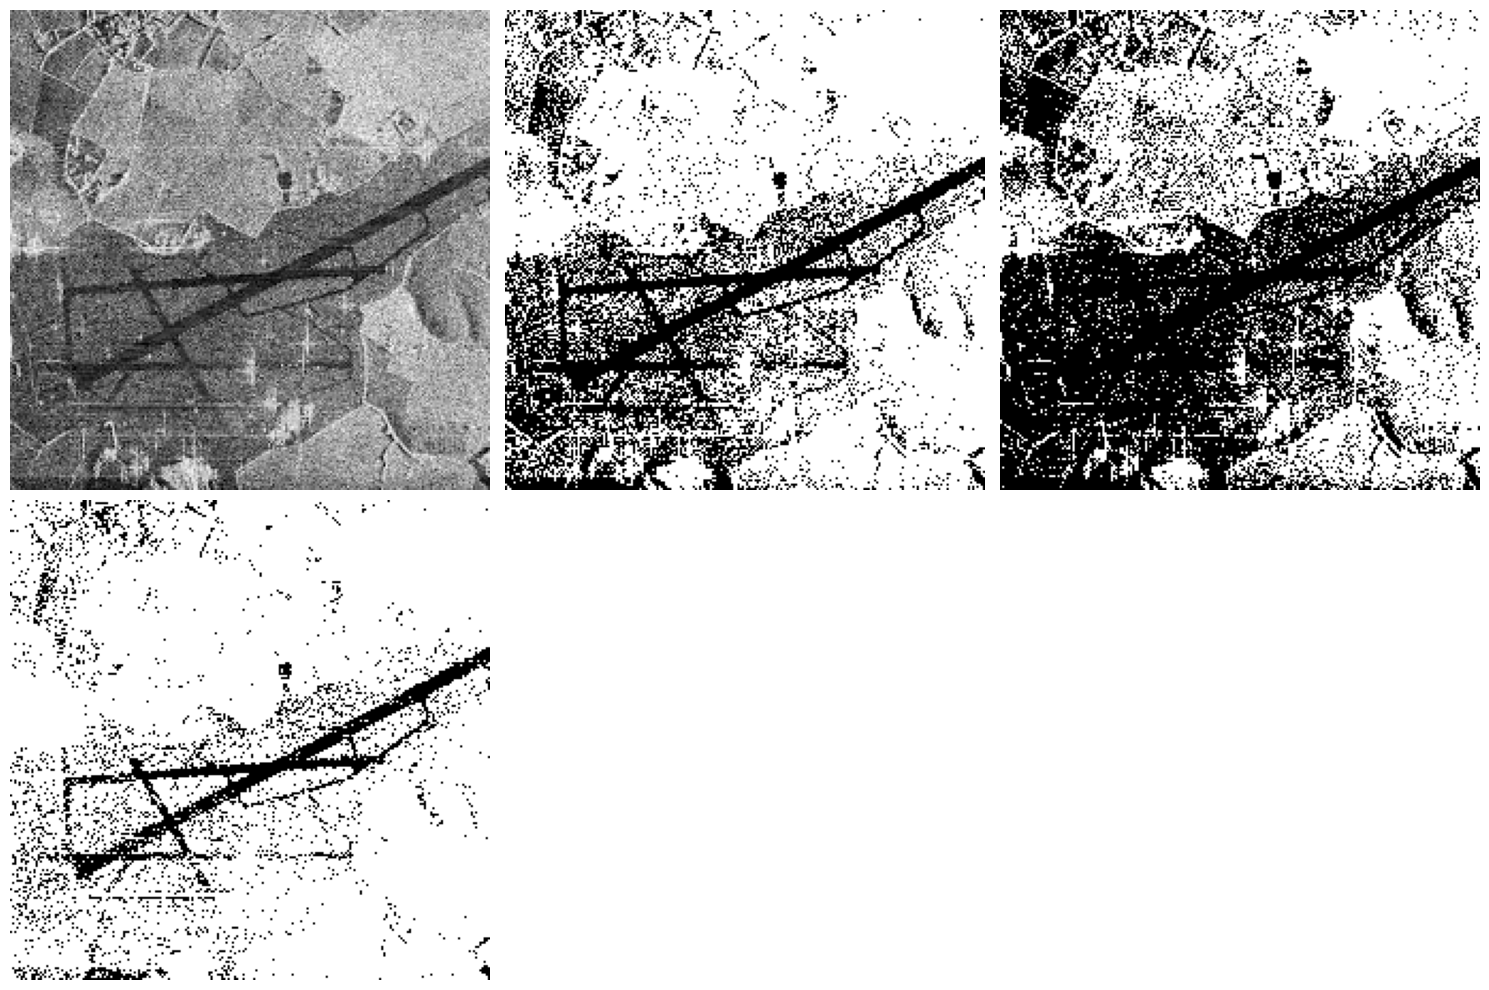

In [84]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(th4, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(th5, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(th6, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()